In [3]:
%matplotlib inline

import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import random
import glob
import itertools
# from scipy import ndimage

In [94]:
# seeded random state to get always the same result
random = np.random.RandomState(0)

def plot(ax, data, **kwargs):
    ax.plot(data, **kwargs)
    ax.set_title(kwargs['label'])

def plot_results(results):
    fig, ax = plt.subplots(4, 3, figsize=(13, 6))
    plot(ax[0, 0], results[0,:], label='Results 1')
    plot(ax[0, 1], results[1,:], label='Results 2')
    plot(ax[0, 2], results[2,:], label='Results 3')
    plot(ax[1, 0], results[0,:], label='Results 1', color='red')
    plot(ax[1, 1], results[1,:], label='Results 2', color='red')
    plot(ax[1, 2], results[2,:], label='Results 3', color='red')
    plot(ax[2, 0], results[0,:], label='Results 1', color='orange')
    plot(ax[2, 1], results[1,:], label='Results 2', color='orange')
    plot(ax[2, 2], results[2,:], label='Results 3', color='orange')
    plot(ax[3, 0], results[0,:], label='Results 1', color='green')
    plot(ax[3, 1], results[1,:], label='Results 2', color='green')
    plot(ax[3, 2], results[2,:], label='Results 3', color='green')
    fig.tight_layout()

def E(s, w):
    sum_ = 0
    N = len(s)
    for i, j in itertools.product(range(N), repeat=2):
        sum_ += w[i, j] * s[i] * s[j]
    E = (-0.5) * sum_
    return E

def E_i(s, w, i):
    sum_ = 0
    N_i = set(range(len(s))) - set([i])
    for j in N_i:
        sum_ += w[i, j] * s[i] * s[j]
    E = (-0.5) * sum_
    return E

def P(s, i, beta_t, w):
    Delta_E = (-2) * E_i(s, w, i)
    beta_t
    return (1 + np.e ** (beta_t * Delta_E)) ** -1

def arbitrary_weightings(N):
    W = random.rand(N, N)
    W = (W + W.T) / 2  # symmetrically
    W *= (1 - np.eye(N))  # zero diagonal
    return W

def flip(s, i, p):
    s_old = s
    s_new = s.copy()
    s_new[i] *= -1
    states = [s_old, s_new]
    return states[random.choice([0, 1], p=[1-p, p])]

def simulated_annealing(beta = 0.1, tau = 1.1, t_max=100, M=1, N=6):
    # Small initial beta, tau > 1
    s = random.rand(N)
    W = arbitrary_weightings(N)
    costs = [E(s, W)]
    temperatures = [1 / beta]
    for t in range(t_max):
        for _ in range(M):
            i = random.randint(0, N-1, 1)[0]
            p = P(s, i, beta, W)
            s = flip(s, i, p)
        costs.append(E(s, W))
        temperatures.append(1 / beta)
        beta *= tau
    return s, costs, temperatures


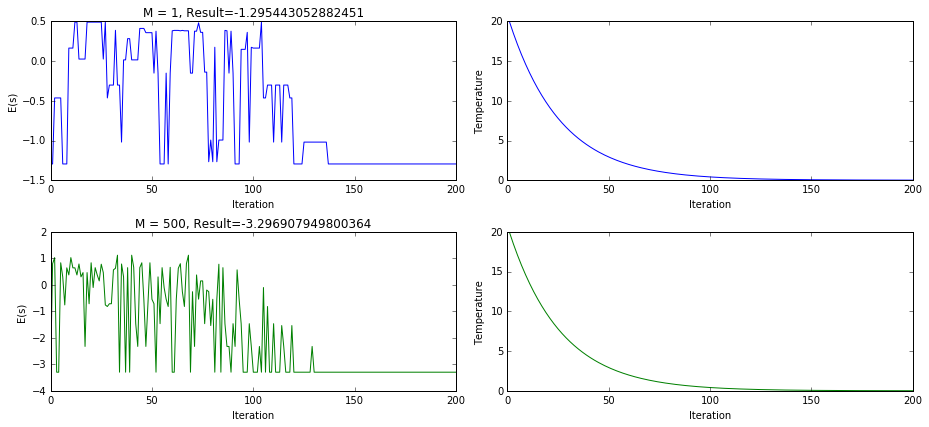

In [97]:
s, costs, temperatures = simulated_annealing(beta=0.05, tau=1.04, t_max=200, M=1)

fig, axes = plt.subplots(2, 2, figsize=(13, 6))

axes[0, 0].plot(costs)
axes[0, 0].set_title('M = 1, Result={}'.format(costs[-1]))
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('E(s)')
axes[0, 1].plot(temperatures)
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Temperature')


s, costs, temperatures = simulated_annealing(beta=0.05, tau=1.04, t_max=200, M=500)

axes[1, 0].plot(costs, color='green')
axes[1, 0].set_title('M = 500, Result={}'.format(costs[-1]))
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylabel('E(s)')
axes[1, 1].plot(temperatures, color='green')
axes[1, 1].set_xlabel('Iteration')
axes[1, 1].set_ylabel('Temperature')

fig.tight_layout()